# Decision Trees
You should build a machine learning pipeline using a decision tree model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a decision tree model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

https://github.com/Sodabeh-Taherpanah/ML-examples/blob/main/datasets/mnist.csv

In [47]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pydotplus
from IPython.display import Image



mnist_path = "mnist.csv"
df = pd.read_csv(mnist_path)

In [24]:
print(df.head())
print(df.info())
print(df.describe())

      id  class  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0  31953      5       0       0       0       0       0       0       0   
1  34452      8       0       0       0       0       0       0       0   
2  60897      5       0       0       0       0       0       0       0   
3  36953      0       0       0       0       0       0       0       0   
4   1981      3       0       0       0       0       0       0       0   

   pixel8  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0     

In [25]:
df.drop(columns=['id'], inplace=True)

X = df.iloc[:, 1:].values  # our Features
y = df.iloc[:, 0].values  #lable

normalize

first 5 images

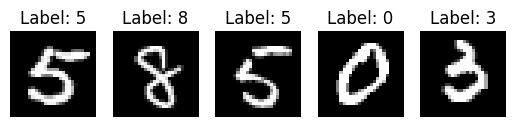

In [41]:
for i in range(5):
    image = X[i].reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {y[i]}")

plt.show()

In [26]:
X = X / 255.0

# Remove Underrepresented Classes

In [42]:

class_counts = Counter(y)
rare_classes = [cls for cls, count in class_counts.items() if count < 2]

# Filter out rare classes

In [43]:

mask = ~np.isin(y, rare_classes)
X_filtered, y_filtered = X[mask], y[mask]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

In [31]:
dt_clf = DecisionTreeClassifier(
    criterion='gini',  # 'entropy' is another option
    max_depth=12,  # Increased depth for better learning
    min_samples_split=5,  # Minimum samples per split
    min_samples_leaf=2,  # Prevents overfitting by setting a minimum leaf size
    random_state=42
)

In [32]:
dt_clf.fit(X_train, y_train)


y_pred = dt_clf.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.7525


In [34]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        75
           1       0.85      0.97      0.90        97
           2       0.77      0.74      0.76        78
           3       0.74      0.61      0.67        84
           4       0.68      0.73      0.71        74
           5       0.63      0.60      0.62        73
           6       0.78      0.79      0.79        78
           7       0.84      0.88      0.86        85
           8       0.61      0.61      0.61        83
           9       0.67      0.64      0.66        73

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



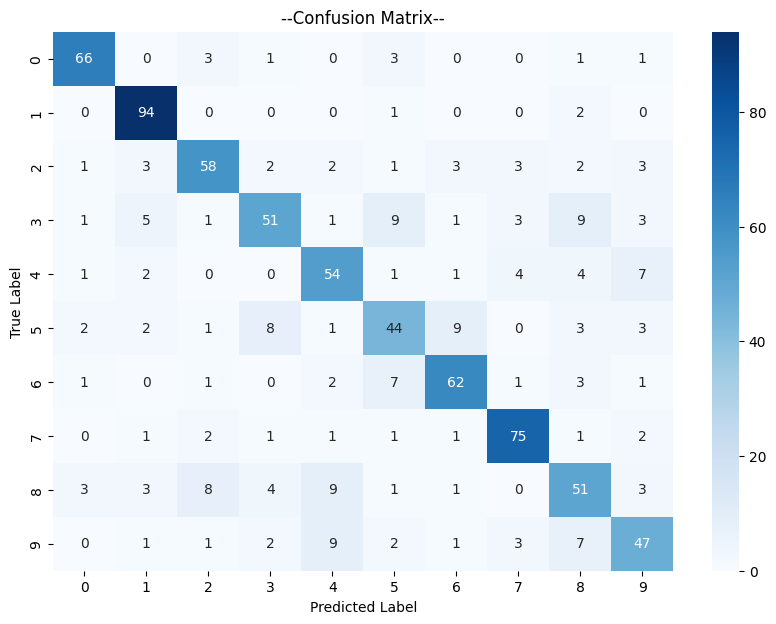

In [44]:
#  visual
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("--Confusion Matrix--")
plt.show()

In [37]:
tree_rules = export_text(dt_clf, feature_names=[f"pixel_{i}" for i in range(X.shape[1])])
print("\nDecision Tree Rules:\n", tree_rules[:1000])


Decision Tree Rules:
 |--- pixel_350 <= 0.46
|   |--- pixel_435 <= 0.00
|   |   |--- pixel_414 <= 0.05
|   |   |   |--- pixel_183 <= 0.02
|   |   |   |   |--- pixel_431 <= 0.02
|   |   |   |   |   |--- pixel_514 <= 0.04
|   |   |   |   |   |   |--- pixel_569 <= 0.25
|   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |--- pixel_569 >  0.25
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- pixel_514 >  0.04
|   |   |   |   |   |   |--- pixel_494 <= 0.00
|   |   |   |   |   |   |   |--- pixel_569 <= 0.66
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- pixel_569 >  0.66
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- pixel_494 >  0.00
|   |   |   |   |   |   |   |--- pixel_294 <= 0.05
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- pixel_294 >  0.05
|   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |--- pixel_431 >  0.02
|   |   |   |   |   |--- pixel_295 <=

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.704697 to fit



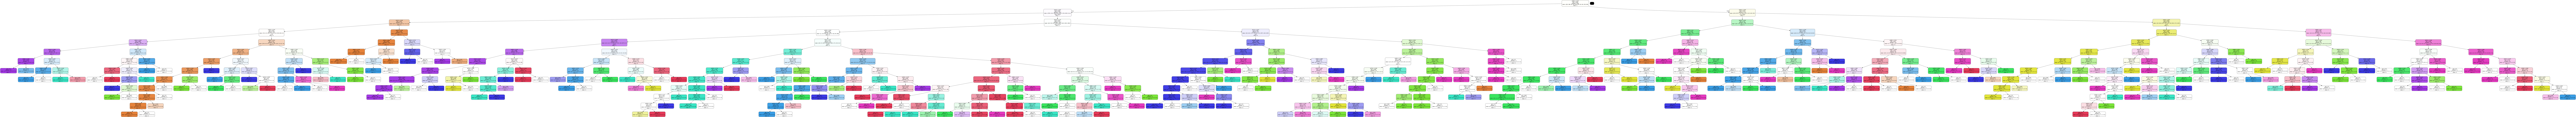

In [39]:
dot_data = export_graphviz(dt_clf, out_file=None, filled=True, rounded=True, class_names=[str(i) for i in range(10)])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#: The Random Forest model should outperform the basic Decision Tree.
Classification Report: You should see higher precision, recall, and F1-scores for most classes.
Confusion Matrix: The confusion matrix will show how well each class is predicted, with the diagonal representing correct predictions and off-diagonal cells representing misclassifications.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)   # n_estimators : No of decision trees


rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Random Forest Accuracy: 0.9287
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        70
           1       0.96      0.95      0.95       100
           2       0.88      0.90      0.89        73
           3       0.93      0.91      0.92        86
           4       0.93      0.94      0.93        80
           5       0.88      0.88      0.88        64
           6       0.98      0.98      0.98        90
           7       1.00      0.94      0.97        67
           8       0.94      0.88      0.91        94
           9       0.84      0.92      0.88        76

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



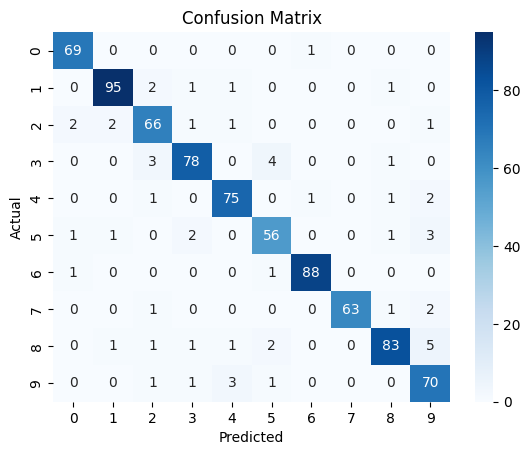

In [49]:
y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")


print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

 tune hyperparameters  to optimize performance.

param_grid: search over a specified hyperparameter grid to find the best combination of hyperparameters for a machine learning model.

Cross-Validation: helps in selecting the best hyperparameters that will lead to better generalization on unseen data.

GridSearchCV: the data is split into multiple subsets (folds), and the model is trained on some folds while evaluated on others.

In [50]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter
param_grid = {
    'n_estimators': [50, 100, 200],   # Use 50 trees
    'max_depth': [10, 20, 30, None],    #for limits how deep the individual trees can grow
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Using the best model to predict
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Accuracy: 0.9275
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        70
           1       0.96      0.95      0.95       100
           2       0.89      0.89      0.89        73
           3       0.93      0.90      0.91        86
           4       0.91      0.94      0.93        80
           5       0.85      0.89      0.87        64
           6       0.98      0.97      0.97        90
           7       0.98      0.93      0.95        67
           8       0.92      0.88      0.90        94
           9       0.88      0.93      0.90        76

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



Why Random Forest is Better:

    Ensemble Learning: Random Forest uses multiple decision trees to make predictions, reducing overfitting and improving generalization.
    Feature Importance: Random Forest provides insight into which features are most important for classification, which can help in feature selection for further improvement.

